## Classification of images using artificial nervous network technologies (ANN) and tawafruce nerve networks (CNN)

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [43]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_train = X_train/255
X_test = X_test/255

In [46]:
X_train_1D = X_train.reshape(len(X_train),28*28)
X_test_1D = X_test.reshape(len(X_test),28*28)
X_train_1D.shape


(60000, 784)

## ANN


In [47]:
mlp_model = keras.Sequential([
keras.layers.Dense(784,input_shape =(784,),activation='relu'),
keras.layers.Dense(512,activation='relu'),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dense(512,activation='relu'),
keras.layers.Dense(10,activation='softmax')
])
mlp_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mlp_model.fit(X_train_1D,y_train,epochs=5)

c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8943 - loss: 0.3485
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9707 - loss: 0.1021
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9795 - loss: 0.0698
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9838 - loss: 0.0571
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9868 - loss: 0.0474


In [56]:
mlp_model.evaluate(X_test_1D,y_test)
y_pred = mlp_model.predict(X_test_1D)
y_pred = np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9627 - loss: 0.1799
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.91      0.97      0.94       974
           9       0.97      0.89      0.93      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

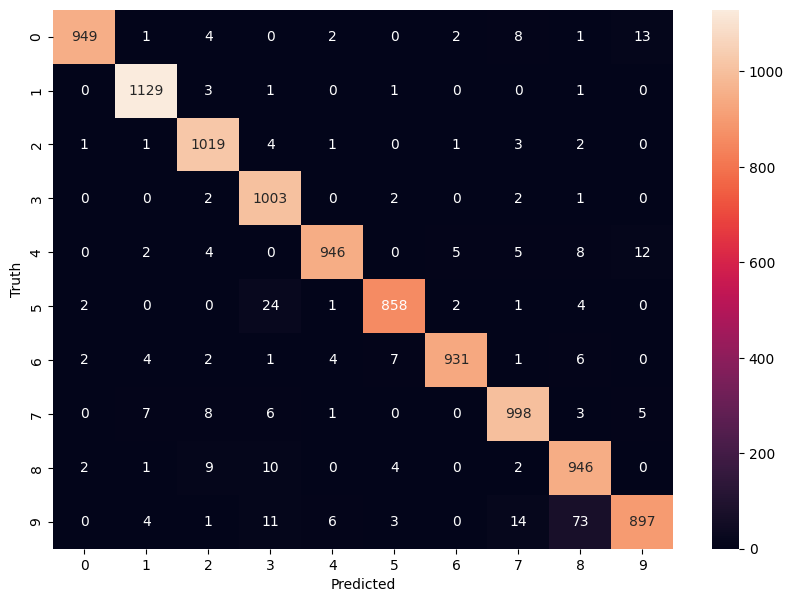

In [60]:

y_predicted = mlp_model.predict(X_test_1D)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


## CNN

In [70]:
CNN_model = keras.Sequential([

  keras.layers.Conv2D(filters=28,kernel_size=(3,3),activation= 'relu',input_shape = (28,28,1)),
  keras.layers.MaxPool2D((2,2)),

  keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'),
  keras.layers.MaxPool2D((2,2)),

  keras.layers.Flatten(),

  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(10,activation='softmax')

])
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [71]:
CNN_model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8988 - loss: 0.3250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9852 - loss: 0.0471
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9901 - loss: 0.0315
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9928 - loss: 0.0219
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9946 - loss: 0.0174


In [77]:
CNN_model.evaluate(X_test,y_test)
y_pred = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0431
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.97      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

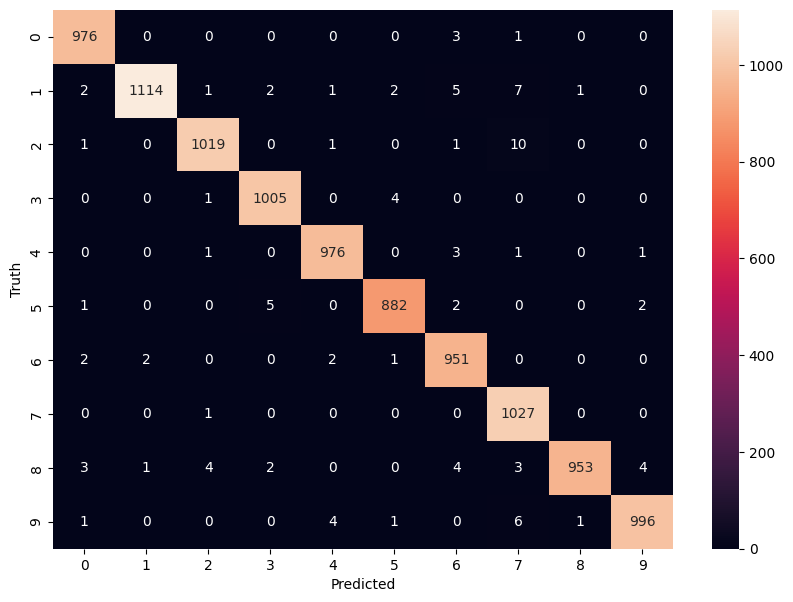

In [81]:

y_predicted = CNN_model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')